# test_cpm
Testing notebook to ensure graphical output is as expected and that long-run simulations are correct.

In [28]:
from cpm import Cpm
from test_utilities import testActivities1_2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from collections import Counter
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [29]:
cpm = Cpm(testActivities1_2)
cpm.run()
pp.pprint(cpm.activities)

[   {   'critical': True,
        'duration': 3.09,
        'ef': 3.09,
        'es': 0,
        'ff': 0.0,
        'id': 'A',
        'lf': 3.09,
        'ls': 0.0,
        'max_duration': 4,
        'min_duration': 1,
        'ml_duration': 2,
        'predecessor': [],
        'successor': ['C', 'D'],
        'tf': 0.0},
    {   'critical': False,
        'duration': 2.96,
        'ef': 2.96,
        'es': 0,
        'ff': 0.13,
        'id': 'B',
        'lf': 3.09,
        'ls': 0.13,
        'max_duration': 3.5,
        'min_duration': 2.5,
        'ml_duration': 3,
        'predecessor': [],
        'successor': ['C', 'D'],
        'tf': 0.13},
    {   'critical': True,
        'duration': 2.91,
        'ef': 6.01,
        'es': 3.09,
        'ff': 0.0,
        'id': 'C',
        'lf': 6.01,
        'ls': 3.09,
        'max_duration': 4,
        'min_duration': 2,
        'ml_duration': 3,
        'predecessor': ['A', 'B'],
        'successor': ['F', 'E'],
        'tf': 0.0},
  

In [30]:
cnt = Counter()
for activity in testActivities1_2:
    cnt[activity["id"]] = 0
cnt

Counter({'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0})

## Sampling

In [31]:
total_durations = []
iterations = 1000
for i in range(iterations):
    cpm = Cpm(testActivities1_2)
    cpm.run()
    total_durations.append(cpm.earlyFinish)
    for activity in cpm.activities:
        if activity["critical"]:
            cnt[activity["id"]] += 1

In [32]:
cnt

Counter({'A': 170,
         'B': 830,
         'C': 1000,
         'D': 0,
         'E': 524,
         'F': 476,
         'G': 524,
         'H': 1000})

In [33]:
total_durations.sort()

In [34]:
arr_durations = np.array(total_durations)
arr_durations

array([14.23713939, 14.95901279, 14.9975784 , 15.08004937, 15.18640197,
       15.34062644, 15.37236118, 15.38642162, 15.40887152, 15.41836588,
       15.43587202, 15.47872807, 15.48864027, 15.49207817, 15.49795555,
       15.57296645, 15.59719104, 15.60994629, 15.63124962, 15.63266993,
       15.65712409, 15.66819254, 15.66869259, 15.67634829, 15.70911637,
       15.71383758, 15.7659869 , 15.76823877, 15.77820071, 15.7823607 ,
       15.78373237, 15.78573997, 15.79775914, 15.80483754, 15.82887874,
       15.84134238, 15.84259987, 15.85588039, 15.85690176, 15.87355356,
       15.89233187, 15.90060517, 15.90639686, 15.91498782, 15.91665175,
       15.93100793, 15.93292907, 15.94715733, 15.95641568, 15.96269183,
       15.96632536, 16.0080546 , 16.01578765, 16.02358734, 16.05962623,
       16.08267887, 16.09162603, 16.09164873, 16.09314249, 16.1076928 ,
       16.1226909 , 16.13224582, 16.1409747 , 16.17636953, 16.21122559,
       16.2130876 , 16.21520992, 16.2283277 , 16.23167497, 16.24

In [35]:
# use function to create a numpy array that is composed of 1000 values in increments of 0.001
percenter = lambda v: v * 0.001
v_func = np.vectorize(percenter)

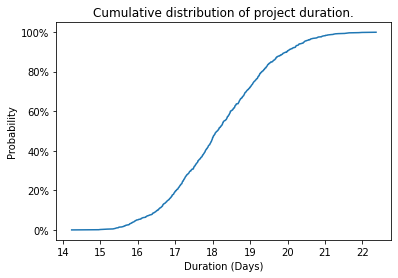

In [36]:
ax = plt.plot(arr_durations, v_func(np.arange(arr_durations.size)))
plt.title("Cumulative distribution of project duration.")
plt.xlabel("Duration (Days)")
plt.ylabel("Probability")

# set y-axis ticks as percent values, with 1 being 100%
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [37]:
activityIDs = list(cnt.keys())

In [38]:
activityCriticalCount = [int(value)/iterations for value in cnt.values()]

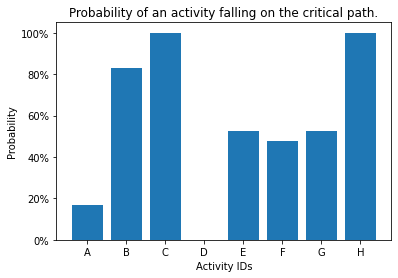

In [39]:
plt.bar(activityIDs, activityCriticalCount)
plt.title("Probability of an activity falling on the critical path.")
plt.xlabel("Activity IDs")
plt.ylabel("Probability")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [40]:
print(f"5% probability the project is done in {np.percentile(arr_durations, 5)} days.")
print(f"50% probability the project is done in {np.percentile(arr_durations, 50)} days.")
print(f"95% probability the project is done in {np.percentile(arr_durations, 90)} days.")

5% probability the project is done in 15.96614368632941 days.
50% probability the project is done in 18.122444495837314 days.
95% probability the project is done in 19.96858885196516 days.
